In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [27]:
bank=pd.read_csv("C:/Users/Admin/Downloads/bank_data.csv")

In [28]:
bank.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
bank.shape

(45211, 32)

In [30]:
bank=bank.dropna()

In [31]:
bank.shape

(45211, 32)

In [33]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:title={'center':'age'}, xlabel='y'>

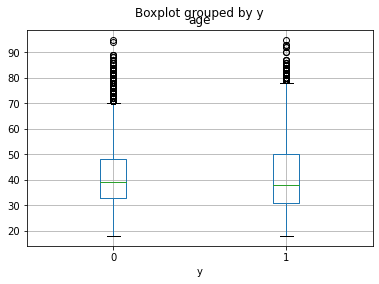

In [8]:
bank.boxplot(column='age', by='y')

In [ ]:
#In this feature we can clearly see there are lot of outliers and can say this is not a great feature.

In [10]:
x=bank.iloc[:,1:31]
y=bank.iloc[:,31]
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred=classifier.predict_proba(x)

In [12]:
y_pred

array([[0.97996182, 0.02003818],
       [0.98416956, 0.01583044],
       [0.9940734 , 0.0059266 ],
       ...,
       [0.04974327, 0.95025673],
       [0.87253002, 0.12746998],
       [0.51214145, 0.48785855]])

In [13]:
y_pred=classifier.predict(x)

In [14]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)

In [16]:
confusion_matrix

array([[39239,   683],
       [ 3999,  1290]], dtype=int64)

In [22]:
accuracy=(39239+1290)/(39239+683+3999+1290)*100

In [23]:
accuracy

89.64411315830219

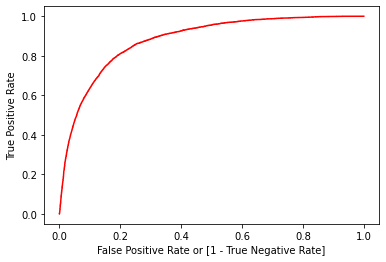

In [24]:
#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])
auc = roc_auc_score(y, y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
auc

0.6133970388599231

In [ ]:
# using Train_test split

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x=bank.iloc[:,1:31]
y=bank.iloc[:,31]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
